<a href="https://colab.research.google.com/github/Manoj101295/Advane-flight-price-prediction/blob/main/cotton_diseasevgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import tensorflow

In [50]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [51]:
image_size=[224,224]


In [92]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [93]:
vgg19=ResNet50(input_shape=image_size + [3],weights='imagenet',include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [94]:
for layer in vgg19.layers:
  layer.trainable=False

In [95]:
train_path='/content/drive/MyDrive/cotton diesease/Dataset/train'
test_path='/content/drive/MyDrive/cotton diesease/Dataset/test'

In [96]:
from glob import glob

In [97]:
folders=glob('/content/drive/MyDrive/cotton diesease/Dataset/train/*')

In [98]:
folders

['/content/drive/MyDrive/cotton diesease/Dataset/train/fresh cotton plant',
 '/content/drive/MyDrive/cotton diesease/Dataset/train/fresh cotton leaf',
 '/content/drive/MyDrive/cotton diesease/Dataset/train/diseased cotton plant',
 '/content/drive/MyDrive/cotton diesease/Dataset/train/diseased cotton leaf']

In [99]:
len(folders)

4

In [100]:
from tensorflow.keras.layers import Flatten,Dense

In [101]:
x=Flatten()(vgg19.output)

In [102]:
prediction=Dense(len(folders),activation='softmax')(x)

In [103]:
from tensorflow.keras.models import Model

In [104]:
model=Model(inputs=vgg19.input,outputs=prediction)

In [105]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [106]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [113]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True
    
)

In [114]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [115]:
train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/cotton diesease/Dataset/train',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 1951 images belonging to 4 classes.


In [117]:
test_data=test_datagen.flow_from_directory("/content/drive/MyDrive/cotton diesease/Dataset/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 18 images belonging to 4 classes.


In [118]:
r = model.fit_generator(
  train_data,
  validation_data=test_data,
  epochs=20,
  steps_per_epoch=len(train_data),
  validation_steps=len(test_data))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 48s 783ms/step - loss: 0.9667 - accuracy: 0.6089 - val_loss: 0.8747 - val_accuracy: 0.7222
Epoch 2/20
61/61 [==============================] - 47s 766ms/step - loss: 1.0565 - accuracy: 0.5920 - val_loss: 0.9234 - val_accuracy: 0.7222
Epoch 3/20
61/61 [==============================] - 47s 765ms/step - loss: 0.8710 - accuracy: 0.6535 - val_loss: 1.0481 - val_accuracy: 0.6667
Epoch 4/20
61/61 [==============================] - 47s 765ms/step - loss: 0.9661 - accuracy: 0.6530 - val_loss: 0.7221 - val_accuracy: 0.7778
Epoch 5/20
61/61 [==============================] - 47s 764ms/step - loss: 0.8201 - accuracy: 0.6694 - val_loss: 1.0702 - val_accuracy: 0.5556
Epoch 6/20
61/61 [==============================] - 47s 764ms/step - loss: 0.7238 - accuracy: 0.7063 - val_loss: 0.7976 - val_accuracy: 0.7222
Epoch 7/20
61/61 [==============================] - 47s 765ms/step - loss: 0.7591 - accuracy: 0.7048 - val_loss: 1.0304 - val_accuracy: 0.6667

In [119]:
import matplotlib.pyplot as plt

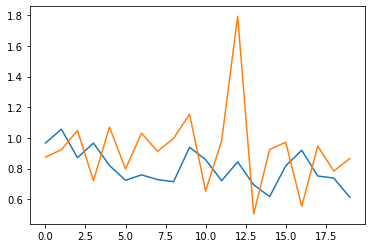

In [127]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.show()

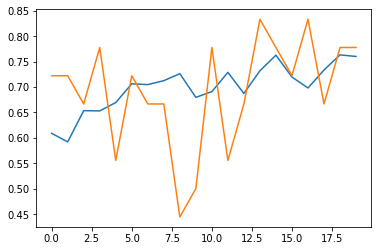

In [126]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.show()